# Assignment 3: Clustering and Multi Layer Perceptron

Student Name: <strong>Parthasarathy Rajendiran</strong> <br>
Student ID: <strong>8883828</strong>
<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Part 1: Clustering

#### Loading iris dataset

In [55]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [56]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

#### 1. Reducing Dimensions to 2

Using Principal Component Analysis, reducing the dimension

In [58]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [59]:
X_pca.shape

(150, 2)

#### 2. Clustering model

K-Means clustering

In [60]:
kmeans_model = KMeans(n_clusters=y.nunique(), n_init='auto', random_state=8883828)
y_pred = kmeans_model.fit_predict(X_pca)

#### 3. Plotting clusters

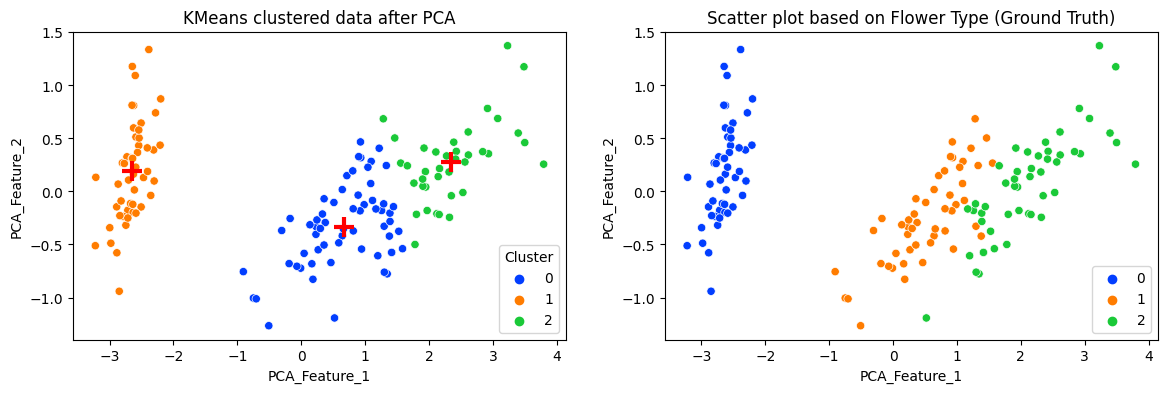

In [72]:
df1 = pd.DataFrame(X_pca, columns=['PCA_Feature_1', 'PCA_Feature_2'])
df1['Cluster'] = y_pred
df1['Flower_Type'] = y

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.scatterplot(data=df1, x='PCA_Feature_1', y='PCA_Feature_2', hue='Cluster', legend='full', palette='bright', ax=axes[0])
axes[0].scatter(
    kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], 
    marker='+', c='red', s=200, linewidths=3, label='Centroids'
)
axes[0].set_title('KMeans clustered data after PCA')

sns.scatterplot(data=df1, x='PCA_Feature_1', y='PCA_Feature_2', hue='Flower_Type', legend='full', palette='bright', ax=axes[1])
axes[1].set_title('Scatter plot based on Flower Type (Ground Truth)')
plt.legend()
plt.show()

In [64]:
pd.Series(y_pred).value_counts()

0    61
1    50
2    39
Name: count, dtype: int64

By comparing the 2D Plot of the clusters and the plot of the ground truth,   
the first cluster (Cluster 1), clearly represents a Flower type (0)  
the other two clusters have some mismatches.

#### 4. Normalization

Normalizing with Standard Scaler

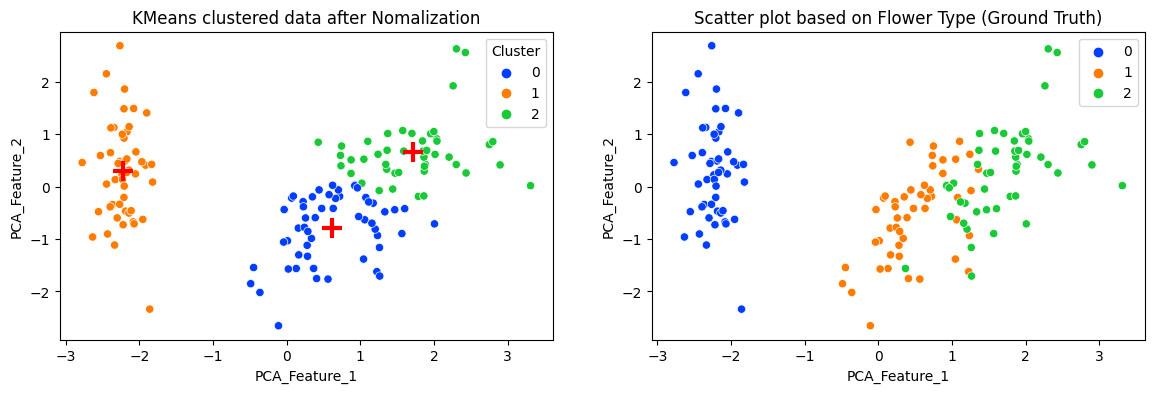

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca_scaled = pca.fit_transform(X_scaled)
y_pred_scaled = kmeans_model.fit_predict(X_pca_scaled)

df2 = pd.DataFrame(X_pca_scaled, columns=['PCA_Feature_1', 'PCA_Feature_2'])
df2['Cluster'] = y_pred_scaled
df2['Flower_Type'] = y

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.scatterplot(data=df2, x='PCA_Feature_1', y='PCA_Feature_2', hue='Cluster', legend='full', palette='bright', ax=axes[0])
axes[0].scatter(
    kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], 
    marker='+', c='red', s=200, linewidths=3, label='Centroids'
)
axes[0].set_title('KMeans clustered data after Nomalization')

sns.scatterplot(data=df2, x='PCA_Feature_1', y='PCA_Feature_2', hue='Flower_Type', legend='full', palette='bright', ax=axes[1])
axes[1].set_title('Scatter plot based on Flower Type (Ground Truth)')

plt.legend()
plt.show()

Normalization of the features made the points evenly spread around the centroids in each cluster. However, it is not successful in correctly representing the actual flower type.  
In my opinion, for this dataset with the dimensionality reduced to 2, Normalization doesn't help in the clustering.

---

## Part 2: Model Training and Evaluation

In [3]:
df = pd.read_csv('../../practical_labs/datasets/stroke.csv')
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Preprocessing

#### a. Finding Missing Values and Data Imputation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

`bmi` is the only column with missing values

In [6]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

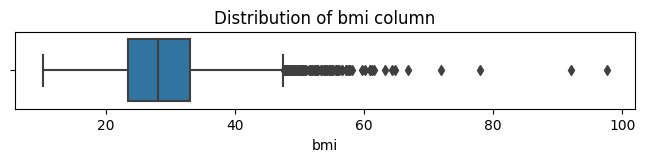

In [7]:
plt.figure(figsize=(8, 1))
sns.boxplot(df, x='bmi')
plt.title('Distribution of bmi column')
plt.show()

There is evidence of outliers. So, it is better to impute with `Median` than the `Mean`.

In [8]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

#### b. Encoding Categorical columns

In [9]:
categorical_cols = df.select_dtypes(include='object_').columns
categorical_cols

In [12]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
df_encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


#### c. Class balancing

In [14]:
X = df_encoded.drop(columns=['stroke'])
y = df['stroke']

Class distribution

In [15]:
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

The data is highly imbalanced

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
smote = SMOTE(random_state=8883828, sampling_strategy=0.4, k_neighbors=10)
X, y = smote.fit_resample(X, y)

Class Distribution after balancing

In [19]:
y.value_counts()

stroke
0    4861
1    1944
Name: count, dtype: int64

### ML Model Training and Testing Tasks

#### 1. Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8883828, stratify=y)
print(f'The data is splitted into train set with {X_train.shape[0]} records and test set with  {X_test.shape[0]}')

The data is splitted into train set with 5444 records and test set with  1361


In [74]:
y_test.value_counts()

stroke
0    972
1    389
Name: count, dtype: int64

#### 2. MLP Model Building

In [23]:
mlp_model = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16), (16, 8), (16,), (8,), (32, 16, 8)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'solver': ['sgd', 'lbfgs', 'adam'],
}

grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16),
                                                (16, 8), (16,), (8,),
                                                (32, 16, 8)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['sgd', 'lbfgs', 'adam']},
             scoring='f1')

#### 3. Best Parameters

In [24]:
best_params = grid_search.best_params_
print(f'Best Parameters:\n{best_params}')

Best Parameters:
{'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'solver': 'adam'}


The best model trained by GridSearchCV has `two hidden layers` with 64 and 32 neurons respectively, using the `adam` solver, and the learning rate is `0.01`

#### 4. Model Evaluation

In [28]:
def show_metrics(y_actual, y_predicted):
    """ Function to calculate and display the metrics for a classification problem """
    
    # Confusion Matrix
    conf_mat = confusion_matrix(y_actual, y_predicted)
    tn, fp, fn, tp = conf_mat.flatten()
    print(f'True Positive : {tp:>4}\t\tFalse Positive : {fp:>4}\nTrue Negative : {tn:>4}\t\tFalse Negative : {fn:>4}')
    
    # Metrics
    precision = precision_score(y_actual, y_predicted)
    recall = recall_score(y_actual, y_predicted)
    f1 = f1_score(y_actual, y_predicted)
    acc = accuracy_score(y_actual, y_predicted)

    print(
        f'\nPrecision : {precision:.4}\t\tF1 score  : {f1:.4}\nRecall    : {recall:.4}\t\tAccuracy  : {acc:.4%}'
    )

    # Plotting
    group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
    group_counts = [tn, fp, fn, tp]
    group_percentages = ['{0:.2%}'.format(i) for i in conf_mat.flatten()/np.sum(conf_mat)]
    labels = [
        f'{n}\n\n{c}\n\n{p}' for n, c, p in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(4.5, 3))
    ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Greens', linewidths=0.5, linecolor='Black')
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])
    plt.show()
    print(classification_report(y_actual, y_predicted))

In [26]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

True Positive :   86		False Positive :   11
True Negative :  961		False Negative :  303

Precision : 0.8866		F1 score  : 0.3539
Recall    : 0.2211		Accuracy  : 76.9287%


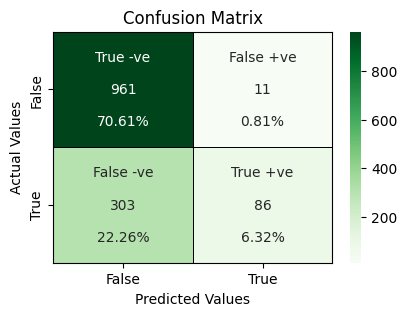

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       972
           1       0.89      0.22      0.35       389

    accuracy                           0.77      1361
   macro avg       0.82      0.60      0.61      1361
weighted avg       0.80      0.77      0.72      1361



In [29]:
show_metrics(y_test, y_pred)

The model with the tuned hyperparameters has the f1 score of `0.35`   
This is due to the higher occurence of False Negatives, (the patients with stroke are predicted as non-stroke)

#### 5. Dimensionality Reduction with PCA

In [30]:
pca = PCA()
X_pca = pca.fit_transform(X)

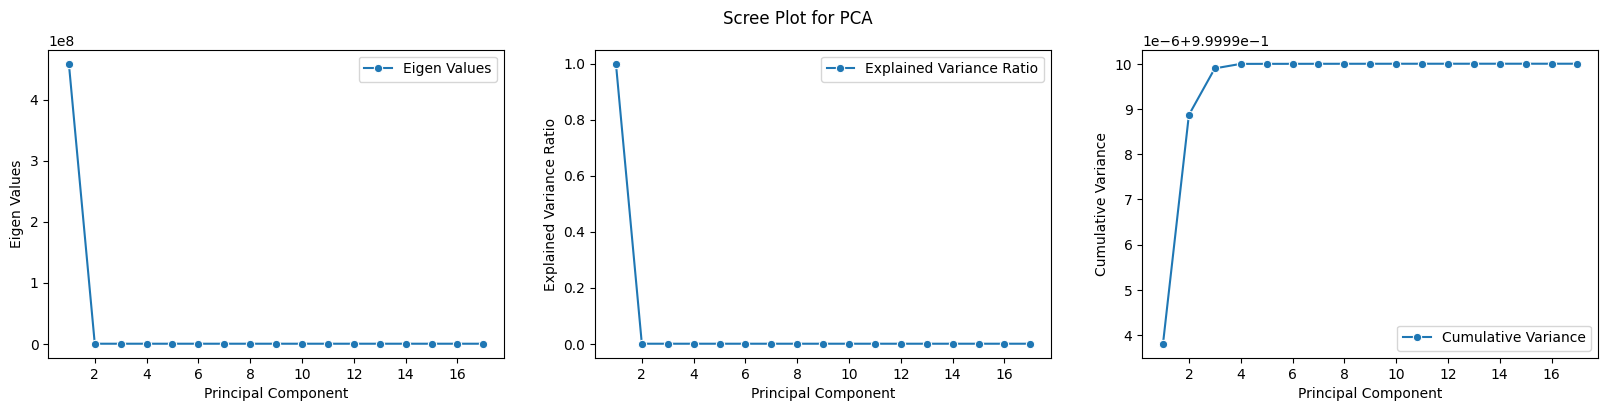

In [49]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

df_scree = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Eigen Values': pca.explained_variance_,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': cumulative_variance
})

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
sns.lineplot(x='Principal Component', y='Eigen Values', data=df_scree, marker='o', label='Eigen Values', ax=axes[0])
sns.lineplot(x='Principal Component', y='Explained Variance Ratio', data=df_scree, marker='o', label='Explained Variance Ratio', ax=axes[1])
sns.lineplot(x='Principal Component', y='Cumulative Variance', data=df_scree, marker='o', label='Cumulative Variance', ax=axes[2])

plt.suptitle('Scree Plot for PCA')
plt.legend()
plt.show()

We can observe the elbow at Principal Component 2. So the optimal number of new dimenstions is `2`.

#### 6. Rebuilding Model with reduced dimensions

In [50]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [51]:
grid_search_pca = GridSearchCV(mlp_model, param_grid, cv=5, scoring='f1')
grid_search_pca.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16),
                                                (16, 8), (16,), (8,),
                                                (32, 16, 8)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['sgd', 'lbfgs', 'adam']},
             scoring='f1')

In [52]:
best_params = grid_search_pca.best_params_
print(f'Best Parameters:\n{best_params}')

Best Parameters:
{'hidden_layer_sizes': (8,), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [53]:
best_model_pca = grid_search_pca.best_estimator_
y_pred_pca = best_model_pca.predict(X_test_pca)

True Positive :   28		False Positive :   17
True Negative :  955		False Negative :  361

Precision : 0.6222		F1 score  : 0.129
Recall    : 0.07198		Accuracy  : 72.2263%


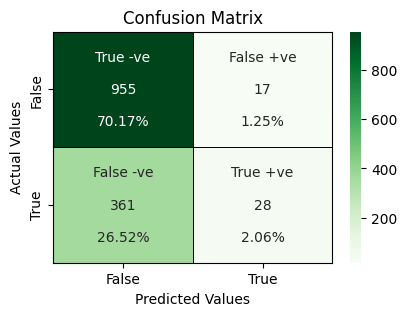

              precision    recall  f1-score   support

           0       0.73      0.98      0.83       972
           1       0.62      0.07      0.13       389

    accuracy                           0.72      1361
   macro avg       0.67      0.53      0.48      1361
weighted avg       0.70      0.72      0.63      1361



In [54]:
show_metrics(y_test, y_pred_pca)

#### 7. Model Comparison

By comparing the models before and after dimensionality reduction, we can observe  
- the F1-score is reducing after PCA from 0.35 to 0.13
- the Accuracy is reducing after PCA from 76.93% to 72.23%
- precision is decreasing after PCA from 0.89 to 0.62
- recall is reducing after PCA from 0.22 to 0.07  

To conclude, the dimensionality reduction led to decrease in model performance. This may be due to any information loss during dimensionality reduction.